In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [16]:
def parse_feature_names(fn):
    with open(fn) as f:
        names, lines = [], f.readlines()
        for line in lines:
            names.append(line.split('-')[-1].lstrip().rstrip())
    return names


In [19]:
def load_as_df(fp):
    raw_data = np.loadtxt(fp + '/data.txt')
    features = parse_feature_names(fp + '/Features.txt')
    return pd.DataFrame(raw_data, columns=features)

In [21]:
data = load_as_df('../data/CBM')
data

,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,15.0,21624.934,1924.342,8470.013,175.239,175.239,681.658,288.0,628.950,2.087,0.998,10.990,1.027,23.803,0.471,1.00,1.000
11930,6.175,18.0,29763.213,2306.745,8800.352,245.954,245.954,747.405,288.0,658.853,2.512,0.998,13.109,1.031,32.671,0.647,1.00,1.000
11931,7.148,21.0,39003.867,2678.052,9120.889,332.389,332.389,796.457,288.0,680.393,2.982,0.998,15.420,1.036,42.104,0.834,1.00,1.000
11932,8.206,24.0,50992.579,3087.434,9300.274,438.024,438.024,892.945,288.0,722.029,3.594,0.998,18.293,1.043,58.064,1.149,1.00,1.000


The propulsion system behaviour has been described with this parameters:
- Ship speed (linear function of the lever position lp).
- Compressor degradation coefficient kMc.
- Turbine degradation coefficient kMt.

In [27]:
data.iloc[:, [1, -2, -1]]

,Ship speed (v) [knots],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
0,3.0,0.95,0.975
1,6.0,0.95,0.975
2,9.0,0.95,0.975
3,12.0,0.95,0.975
4,15.0,0.95,0.975
...,...,...,...
11929,15.0,1.00,1.000
11930,18.0,1.00,1.000
11931,21.0,1.00,1.000
11932,24.0,1.00,1.000


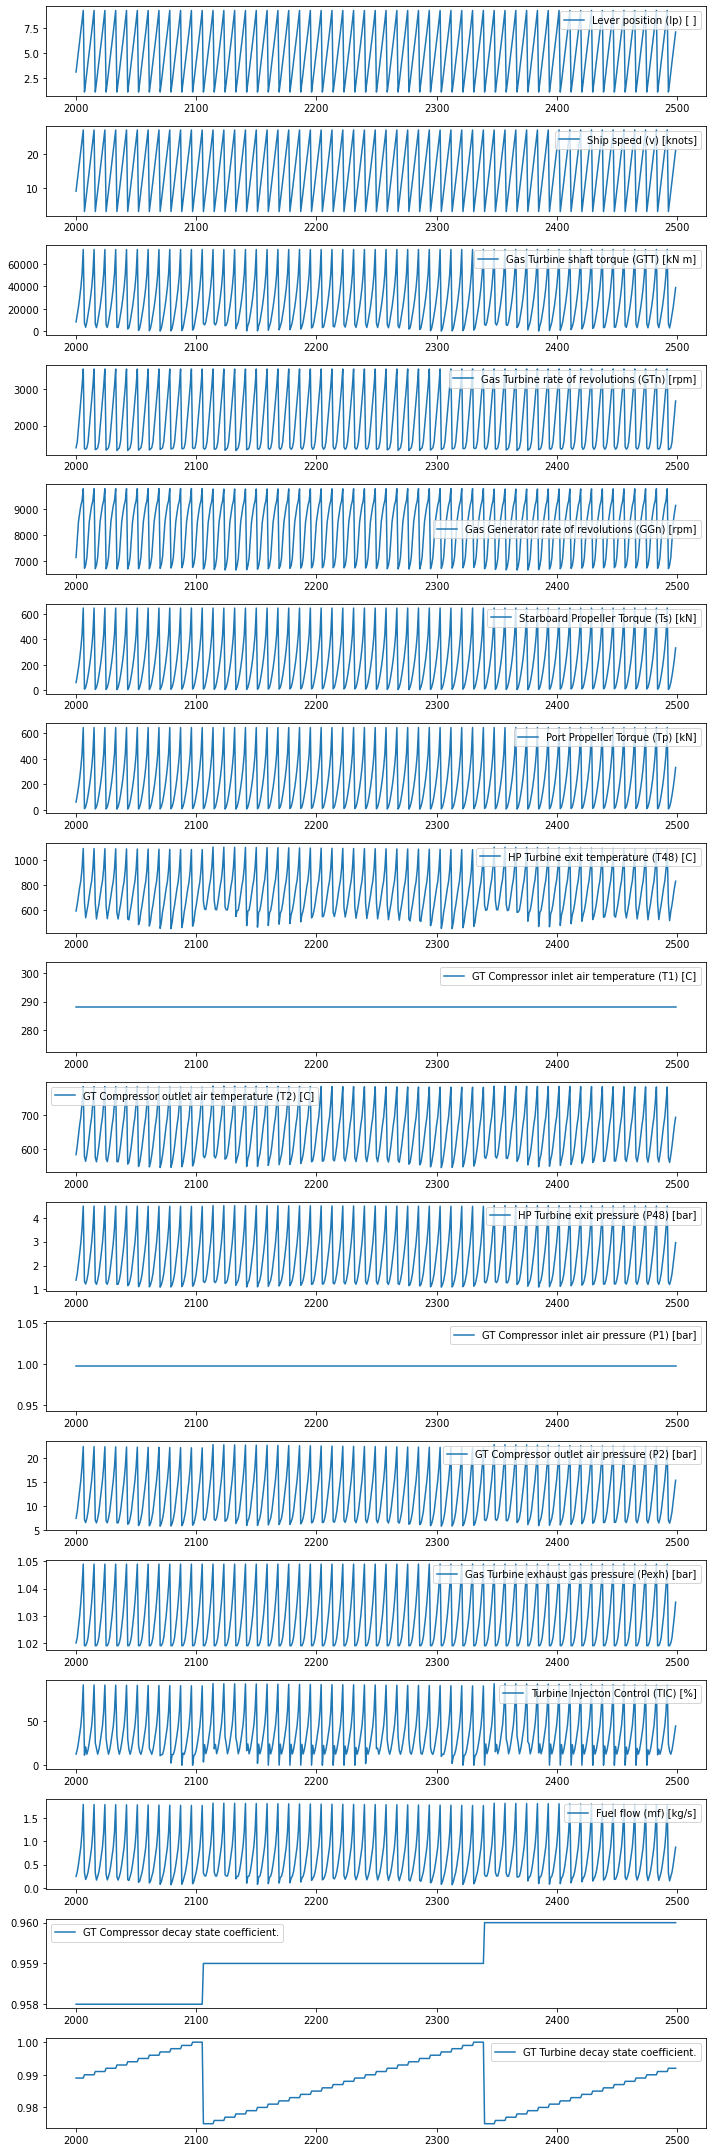

In [58]:
st = 2000
ed = 2500
fig, ax = plt.subplots(data.shape[1], figsize=(10, 30))

for i, (name, item) in enumerate(data.iteritems()):
    item.iloc[st:ed].plot(ax=ax[i], legend=True)

fig.tight_layout()


<AxesSubplot:>

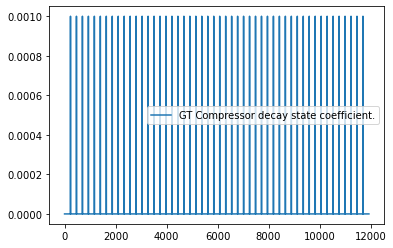

In [62]:
# data.iloc[:, -2].plot(legend=True)
data.iloc[:, -2].diff().plot(legend=True)

<AxesSubplot:>

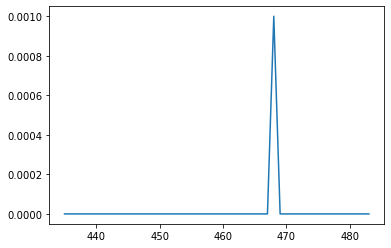

In [75]:
data.iloc[200+234:250+234, -2].diff().plot()

In [101]:
i = 5
data.iloc[:, -2].values.reshape((234, -1), order='F')

array([[0.95 , 0.951, 0.952, ..., 0.998, 0.999, 1.   ],
       [0.95 , 0.951, 0.952, ..., 0.998, 0.999, 1.   ],
       [0.95 , 0.951, 0.952, ..., 0.998, 0.999, 1.   ],
       ...,
       [0.95 , 0.951, 0.952, ..., 0.998, 0.999, 1.   ],
       [0.95 , 0.951, 0.952, ..., 0.998, 0.999, 1.   ],
       [0.95 , 0.951, 0.952, ..., 0.998, 0.999, 1.   ]])